<img src="https://thecxinsights.com/wp-content/uploads/2021/03/Customer-Segmentation-Featured-Image-3.png" width="1000" align="centr"/>


<p style="font-family: Arials; line-height: 1.3; font-size: 26px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #DC143C">Customer Segmentation</p>

<p style="font-family: Arials; font-size: 18px; text-align: center; color: Black">Hello everyone! I would like to present you my new work.</p>

<p style="font-family: Arials; font-size: 18px; text-align: center; color: Black">In this notebook you will see how to do clustering. We are going to cluster the customers based on the RFM:</p>
<p style="font-family: Arials; font-size: 18px; text-align: center; color: Black">I would be very grateful for any feedback on this work and your vote. Happy reading.</p>

<p style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C; line-height:1.0">TABLE OF CONTENTS</p>
<hr style="height: 0.5px; border: 0; background-color: 'Black'">

<p style="font-family: Arials; font-size: 16px; font-style: bold; letter-spacing: 2px; color: #DC143C; line-height:1.0"><a href="#part1" style="color:black">1. INTRODUCTION.</a></p>

<p style="font-family: Arials; font-size: 16px; font-style: bold; letter-spacing: 2px; color: #DC143C; line-height:1.0"><a href="#part2" style="color:black">2. IMPORT LIBRARIES AND DATA SET.</a></p>


<p style="font-family: Arials; font-size: 16px; font-style: bold; letter-spacing: 2px; color: #DC143C; line-height:1.0"><a href="#part3" style="color:black">3 DATA EXPLORATION AND CLEANING</a></p>

<p style="font-family: Arials; font-size: 16px; font-style: bold; letter-spacing: 2px; color: #DC143C; line-height:1.0"><a href="#part4" style="color:black">4 VISUALIZATION</a></p>

<p style="font-family: Arials; font-size: 16px; font-style: bold; letter-spacing: 2px; color: #DC143C; line-height:1.0"><a href="#part5" style="color:black">5. MAKE DATA SET READY FOR MODELLING</a></p>

<p style="text-indent: 2.5vw; font-family: Arials; font-size: 15px; letter-spacing: 2px; color: #DC143C; line-height:1.3">
<a href="#part6" style="color:black">5.1 CLEANING</a></p>

<p style="font-family: Arials; font-size: 16px; font-style: bold; letter-spacing: 2px; color: #DC143C; line-height:1.0"><a href="#part7" style="color:black">6. MODELLING</a></p>



<p id="part1"></p>

# <span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">1. INTRODUCTION</span>


<p style="font-family: Arials; font-size: 18px;font-weight: bold; color: 'Black">This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.</p>

<p style="font-family: Arials; font-size: 18px; text-align: center; color: Black;color: #DC143C">Now let's see what is the problem statment.</p>

<p style="font-family: Arials; font-size: 18px; text-align: center; color: Black">Suppose you are the head of this store and you wish to understand preferences of your costumers to scale up your business.Is it possible for you to look at details of each costumer and devise a unique business strategy for each one of them? Definitely not. But, what you can do is to cluster all of your costumers into say 10 groups based on their purchasing habits and use a separate strategy for costumers in each of these 10 groups. And this is what we call clustering.

<p style="font-family: Arials; font-size: 18px; text-align: center; color: Black">Now, that we understand what is clustering. Let’s make clusters.</p>

<p id="part2"></p>

# <span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">2. LIBRARIES & IMPORT DATA SET</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms


In [2]:
df=pd.read_csv("../input/customersegmentation/Online Retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<p id="part3"></p>

# <span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">3. DATA EXPLORATION</span>

In [3]:
df.shape

(541909, 8)

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.duplicated().sum() #let's handle the duplicacy

5268

In [7]:
df.drop_duplicates(inplace=True)

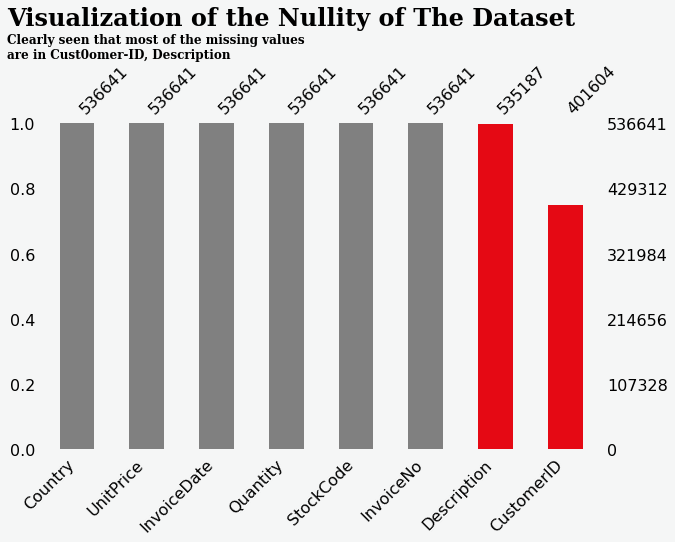

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('#f5f6f6')
fig.patch.set_facecolor('#f5f6f6')

color = ['grey','grey','grey','grey','grey','grey','#E50914','#E50914','#E50914','#E50914']
ms.bar(df,fontsize =16, color = color, sort = 'descending', ax = ax)

ax.text(-1,1.3,'Visualization of the Nullity of The Dataset' ,{'font':'serif', 'color':'black','weight':'bold','size':24})
ax.text(-1,1.2,'Clearly seen that most of the missing values \nare in Cust0omer-ID, Description',{'font':'serif', 'color':'black','weight':'bold','size':12})
fig.show()

<p style="font-family: Arials; font-size: 18px; text-align: center; color: Black;">As we know our data set has around 5.3 lakh rows . so instead of imputing the missing values let's remove those rows:

In [9]:

# drop all rows having missing values
df = df.dropna()
df.shape

(401604, 8)

<p style="font-family: Arials; font-size: 18px; text-align: center; color: #DC143C">Let's make another column amount

In [10]:
df["amount"]=df["Quantity"]*df["UnitPrice"]

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


<p id="part5"></p>

# <span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">5. MAKE DATA SET READY FOR MODELLING</span>

<p style="font-family: Arials; font-size: 24px; text-align: center; color: #DC143C">RFM Analysis

<p style="font-family: Arials; font-size: 18px; text-align: center; color: Black;">RFM (Recency, Frequency, Monetary) analysis is a proven marketing model for behavior based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

<p style="font-family: Arials; font-size: 24px; text-align: center; color: #DC143C">What is Recency, Frequency and Monetary analysis?

<p style="font-family: Arials; font-size: 18px; text-align: center; color: Black;">Valuing customers based on a single parameter is insufficient.
    <br>
For example, you can say that people who spend the most are your best customers. Most of us agree and think the same.
    <br>
But wait! What if they purchased only once? Or a very long time ago? What if they are no longer using your product?
    <br>
So..can they still be considered your best customers? Probably not.
Judging customer value on just one aspect will give you an inaccurate report of your customer base and their lifetime value.
    <br>
That’s why, RFM model combines three different customer attributes to rank customers.
<br>
If they bought in recent past, they get higher points. If they bought many times, they get higher score. And if they spent bigger, they get more points. Combine these three scores to create the RFM score.
<br>
Finally you can segment your customer database into different groups based on this Recency – Frequency – Monetary score.

<p style="font-family: Arials; font-size: 24px; text-align: center; color: #DC143C">Let's make new columns based on RFM

<p style="font-family: Arials; font-size: 24px; color: #DC143C">01. MONETARY

In [12]:
rmf_df=df.groupby(df["CustomerID"])["amount"].sum()
rmf_df=rmf_df.reset_index()
rmf_df.columns=["CustomerID","Monetary"]
rmf_df.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


<p style="font-family: Arials; font-size: 24px; color: #DC143C">02. FREQUENCY

In [13]:
frequency =df.groupby(df["CustomerID"])["InvoiceNo"].count()
frequency =frequency .reset_index()
frequency.columns = ['CustomerID', 'frequency']
frequency .head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [14]:
# merge the two dfs
rmf_df = pd.merge(rmf_df, frequency, on='CustomerID', how='inner')
rmf_df.head()

,CustomerID,Monetary,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


<p style="font-family: Arials; font-size: 24px; color: #DC143C">03. RECENCY

In [15]:
 df["InvoiceDate"]=pd.to_datetime(df['InvoiceDate'])
                

In [16]:
# compute the max date
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [17]:
# compute the diff
df['diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [18]:

# recency
last_purchase = df.groupby('CustomerID')['diff'].min()
last_purchase = last_purchase.reset_index()
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [19]:
# merge
rmf_df = pd.merge(rmf_df, last_purchase, on='CustomerID', how='inner')
rmf_df.columns = ['CustomerID', 'monetary', 'frequency', 'recency']
rmf_df.head()

,CustomerID,monetary,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [20]:
# number of days only
rmf_df['recency'] = rmf_df['recency'].dt.days
rmf_df.head()

,CustomerID,monetary,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


<p id="part4"></p>

<span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">4. VISUALIZATIONS</span>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


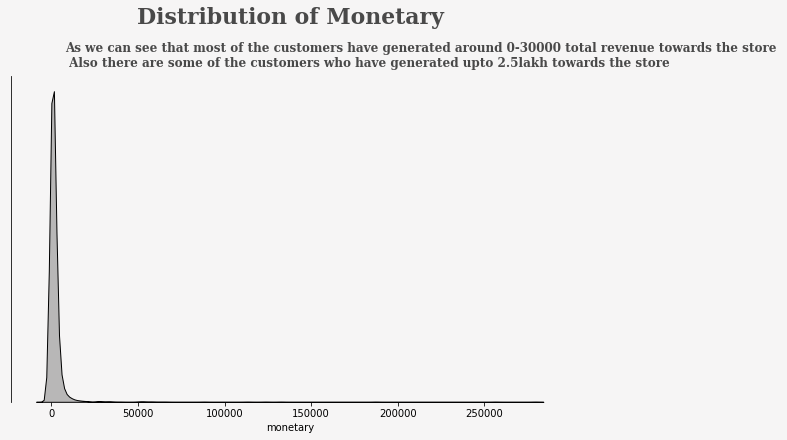

In [21]:
fig=plt.figure(figsize=(10,6))

ax=sns.kdeplot(rmf_df["monetary"],color="black",fill=True)



fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

#ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.text(0.3,1,"Distribution of Monetary", {'font': 'Serif','weight':'bold', 'Size': '22','color':'black'}, alpha = 0.7)
fig.text(0.2,0.9,"As we can see that most of the customers have generated around 0-30000 total revenue towards the store \n Also there are some of the customers who have generated upto 2.5lakh towards the store ", {'font': 'Serif','weight':'bold', 'Size': '12','color':'black'}, alpha = 0.7)

fig.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


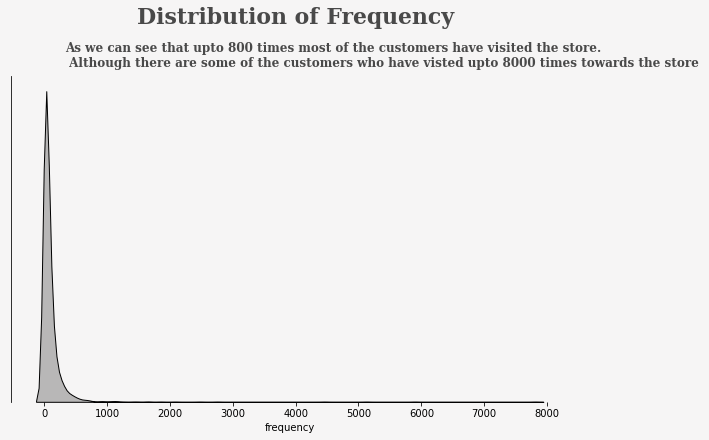

In [22]:
fig=plt.figure(figsize=(10,6))

ax=sns.kdeplot(rmf_df["frequency"],color="black",fill=True)



fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

#ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.text(0.3,1,"Distribution of Frequency", {'font': 'Serif','weight':'bold', 'Size': '22','color':'black'}, alpha = 0.7)
fig.text(0.2,0.9,"As we can see that upto 800 times most of the customers have visited the store.\n Although there are some of the customers who have visted upto 8000 times towards the store ", {'font': 'Serif','weight':'bold', 'Size': '12','color':'black'}, alpha = 0.7)

fig.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


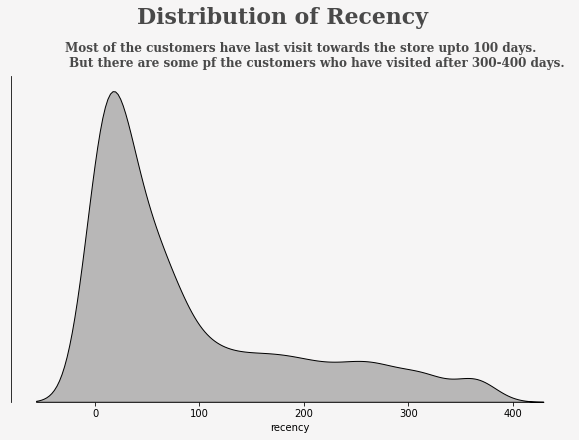

In [23]:
fig=plt.figure(figsize=(10,6))

ax=sns.kdeplot(rmf_df["recency"],color="black",fill=True)



fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

#ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.text(0.3,1,"Distribution of Recency", {'font': 'Serif','weight':'bold', 'Size': '22','color':'black'}, alpha = 0.7)
fig.text(0.2,0.9,"Most of the customers have last visit towards the store upto 100 days.\n But there are some pf the customers who have visited after 300-400 days.  ", {'font': 'Serif','weight':'bold', 'Size': '12','color':'black'}, alpha = 0.7)

fig.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


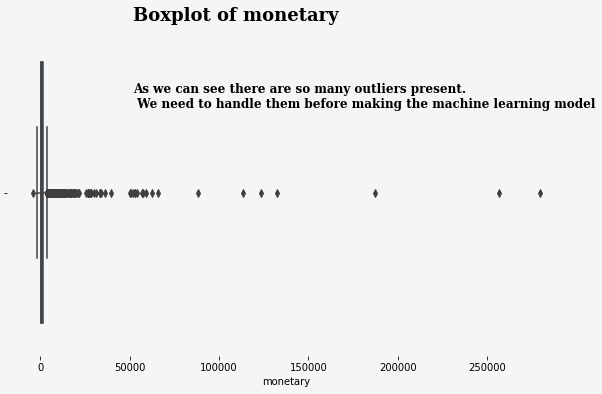

In [24]:
fig=plt.figure(figsize=(10,6))
ax=sns.boxplot(rmf_df["monetary"])
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
fig.text(0.3,0.9,"Boxplot of monetary", fontweight="bold", fontfamily='serif', fontsize=18, color='black')
fig.text(0.3,0.7,"As we can see there are so many outliers present.\n We need to handle them before making the machine learning model", fontweight="bold", fontfamily='serif', fontsize=12, color='black')
fig.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


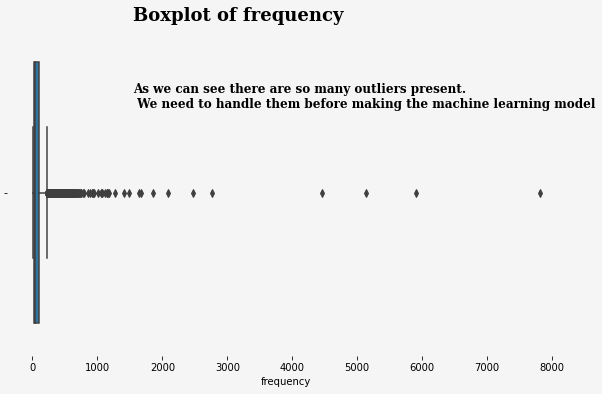

In [25]:
fig=plt.figure(figsize=(10,6))
ax=sns.boxplot(rmf_df["frequency"])
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
fig.text(0.3,0.9,"Boxplot of frequency", fontweight="bold", fontfamily='serif', fontsize=18, color='black')
fig.text(0.3,0.7,"As we can see there are so many outliers present.\n We need to handle them before making the machine learning model", fontweight="bold", fontfamily='serif', fontsize=12, color='black')
fig.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


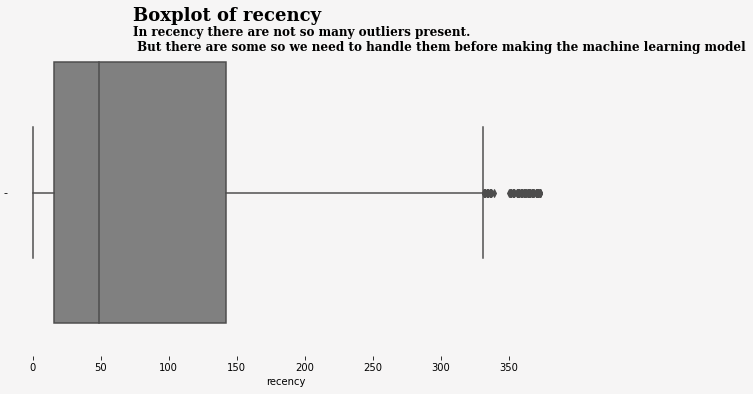

In [26]:
fig=plt.figure(figsize=(10,6))
ax=sns.boxplot(rmf_df["recency"],color="grey")
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
fig.text(0.3,0.9,"Boxplot of recency", fontweight="bold", fontfamily='serif', fontsize=18, color='black')
fig.text(0.3,0.83,"In recency there are not so many outliers present.\n But there are some so we need to handle them before making the machine learning model", fontweight="bold", fontfamily='serif', fontsize=12, color='black')
fig.show()

<p id="part6"></p>
<span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">5.1 Handle-Outliers</span>

<p style="font-family: Arials; font-size: 18px; text-align: center; color: Black;">Now let's do some cleaning. As we know that there are so many outliers present in the data set . Let's handle that.

In [27]:
import numpy as np

In [28]:

def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

    
    
drop_outliers(rmf_df, 'recency')
drop_outliers(rmf_df, 'frequency')
drop_outliers(rmf_df, 'monetary')


<span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">5.2 Scaling </span>

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


df = rmf_df[['monetary', 'frequency', 'recency']]


scaler = StandardScaler()


df = scaler.fit_transform(df)
df.shape


(3543, 3)

In [30]:
rfm_df_scaled = pd.DataFrame(df)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,-1.153222,-1.030942,2.549684
1,1.622399,-0.399132,-0.199896
2,1.561103,0.515905,-0.813348
3,-0.636781,-0.704144,2.374412
4,1.233478,0.995209,-0.627121


<p id="part7"></p>

<span style="font-family: Arials; font-size: 18px; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">6 MODELLING</span>

In [31]:
x = rfm_df_scaled.iloc[:,:].values

# let's check the shape of x
print(x.shape)

(3543, 3)


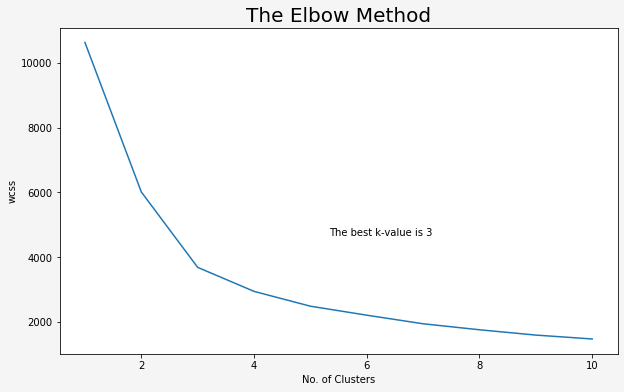

In [32]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
fig=plt.figure(figsize=(10,6))  
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f5f6f6')


plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
fig.text(0.5,0.4,"The best k-value is 3")
plt.show()

In [33]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(x)

KMeans(max_iter=50, n_clusters=3)

In [34]:
kmeans.labels_


array([0, 1, 1, ..., 0, 2, 1], dtype=int32)

In [35]:

# assign the label
rmf_df['cluster_id'] = kmeans.labels_
rmf_df.head()

,CustomerID,monetary,frequency,recency,cluster_id
0,12346.0,0.00,2,325,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,0
5,12352.0,1545.41,95,35,1


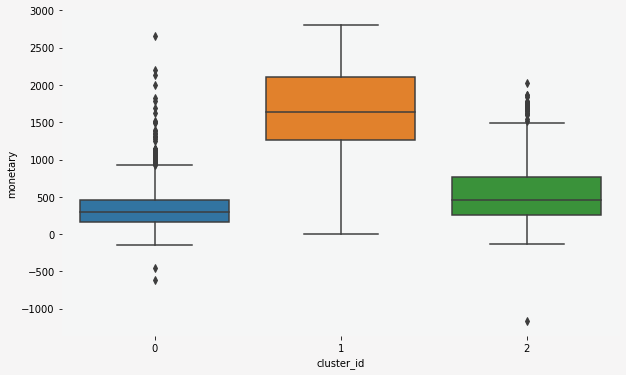

In [36]:

fig=plt.figure(figsize=(10,6))

ax=sns.boxplot(x='cluster_id', y='monetary', data=rmf_df)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f5f6f6')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

#fig.text(0.3,0.9,"Boxplot of recency", fontweight="bold", fontfamily='serif', fontsize=18, color='black')
#fig.text(0.3,0.83,"In recency there are not so many outliers present.\n But there are some so we need to handle them before making the machine learning model", fontweight="bold", fontfamily='serif', fontsize=12, color='black')
fig.show()


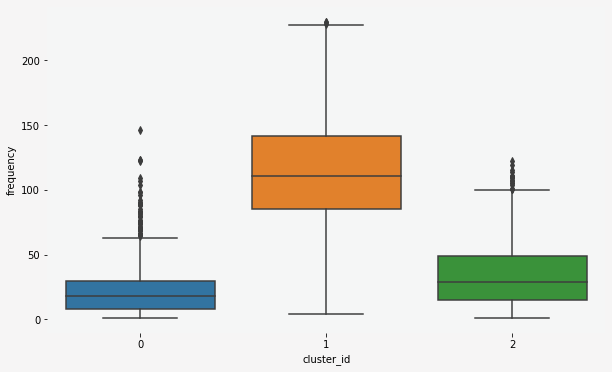

In [37]:
fig=plt.figure(figsize=(10,6))
ax=sns.boxplot(x='cluster_id', y='frequency', data=rmf_df)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f5f6f6')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

#fig.text(0.3,0.9,"Boxplot of recency", fontweight="bold", fontfamily='serif', fontsize=18, color='black')
#fig.text(0.3,0.83,"In recency there are not so many outliers present.\n But there are some so we need to handle them before making the machine learning model", fontweight="bold", fontfamily='serif', fontsize=12, color='black')
fig.show()



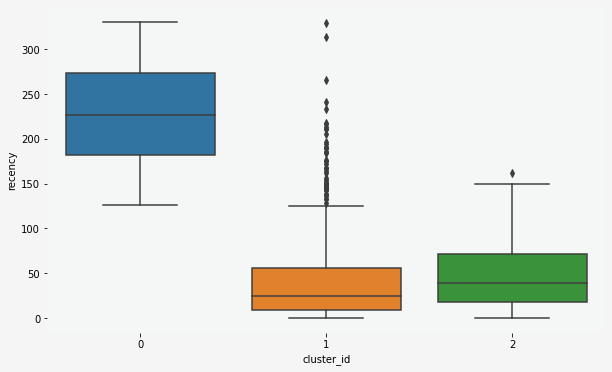

In [38]:
fig=plt.figure(figsize=(10,6))
ax=sns.boxplot(x='cluster_id', y='recency', data=rmf_df)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f5f6f6')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

#fig.text(0.3,0.9,"Boxplot of recency", fontweight="bold", fontfamily='serif', fontsize=18, color='black')
#fig.text(0.3,0.83,"In recency there are not so many outliers present.\n But there are some so we need to handle them before making the machine learning model", fontweight="bold", fontfamily='serif', fontsize=12, color='black')
fig.show()



<span style="font-family: Arials; font-size: 18px;text-align: center; font-style: bold; font-weight: bold; letter-spacing: 2px; color: #DC143C">Thank you for reading this work! Any feedback on this work would be very grateful. If you liked this notebook, Upvote.